## Import Libraries

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Import Data

In [183]:
network_data = pd.read_csv('../labelled_data/pruned_topic_labelled_network.csv')
medicine_data = pd.read_csv('../labelled_data/pruned_topic_labelled_medicine_and_research_users.csv')
media_data = pd.read_csv('../labelled_data/pruned_topic_labelled_media_users.csv')

## Topic Pruning

### Network Data

In [169]:
topics = network_data['topic_name'].value_counts()

In [170]:
topics_pruned = topics[1:].copy()

In [230]:
# Inter-Quartile Range
top_perc = np.percentile(topics_pruned, 95)
bottom_perc = np.percentile(topics_pruned, 5)
perc_range = top_perc - bottom_perc

# Find the indices of the closest values to the percentiles
top_index = (np.abs(topics_pruned - top_perc)).idxmin()
bottom_index = (np.abs(topics_pruned - bottom_perc)).idxmin()

top_pos_index = topics_pruned.index.get_loc(top_index)
bottom_pos_index = topics_pruned.index.get_loc(bottom_index)

top_perc_tick = top_pos_index/2
middle_perc_tick = (bottom_pos_index - top_pos_index)/2
bottom_perc_tick = (bottom_pos_index + len(topics_pruned))/2

In [223]:
bottom_pos_index

728

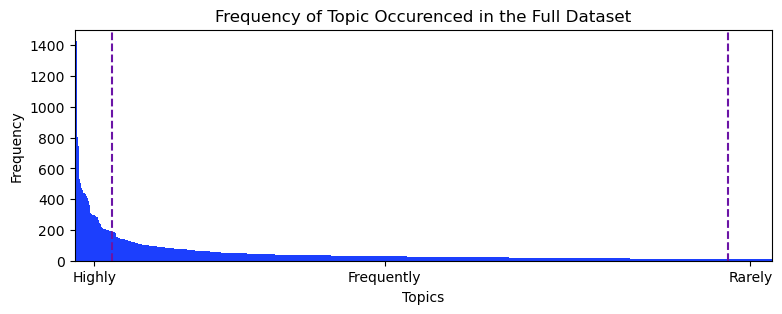

In [224]:
# Creating the graph
plt.figure(figsize=(9, 3))
plt.bar(range(len(topics_pruned)), topics_pruned, color='#1c3ffd', width=1)
plt.title('Frequency of Topic Occurenced in the Full Dataset')
plt.xlabel('Topics')
plt.ylabel('Frequency')
# Remove x-axis ticks and labels
plt.xticks(ticks=[])
# Adjust the x-axis limits to remove space
plt.xlim(-2, len(topics_pruned))

custom_ticks = [top_perc_tick, middle_perc_tick, bottom_perc_tick]  # Example positions
custom_labels = ['Highly', 'Frequently', 'Rarely']  # Example labels

plt.xticks(custom_ticks, custom_labels)

plt.axvline(x=top_pos_index, color='#6b14a6', linestyle='--')
plt.axvline(x=bottom_pos_index, color='#6b14a6', linestyle='--')

plt.show()

### Topic Segments Graphs

In [227]:
topics_highly_pruned = topics_pruned[:int(top_pos_index)].copy()
topics_frequently_pruned = topics_pruned[int(top_pos_index):int(bottom_pos_index)].copy()
topics_rarely_pruned = topics_pruned[int(bottom_pos_index):].copy()

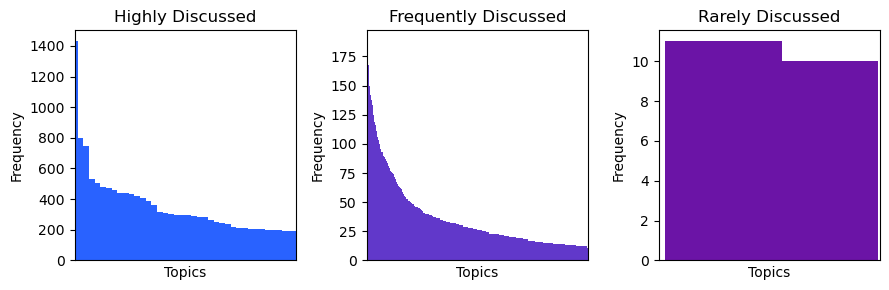

In [228]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

# Plotting the first bar chart
axes[0].bar(topics_highly_pruned.index, topics_highly_pruned, color='#2962ff', width=1)
axes[0].set_title('Highly Discussed')
axes[0].set_xlabel('Topics')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[0].set_xlim(0, len(topics_highly_pruned)-1)

# Plotting the second bar chart
axes[1].bar(topics_frequently_pruned.index, topics_frequently_pruned, color='#6138ca', width=1)
axes[1].set_title('Frequently Discussed')
axes[1].set_xlabel('Topics')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[1].set_xlim(-1, len(topics_frequently_pruned))

# Plotting the third bar chart
axes[2].bar(topics_rarely_pruned.index, topics_rarely_pruned, color='#6b14a6', width=1)
axes[2].set_title('Rarely Discussed')
axes[2].set_xlabel('Topics')
axes[2].set_ylabel('Frequency')
axes[2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[2].set_xlim(-2, len(topics_rarely_pruned))

# Show the plot
plt.tight_layout()
plt.show()

### Medicine Data

In [173]:
medicine_topics = medicine_data['topic_name'].value_counts()

In [174]:
medicine_topics_pruned = medicine_topics[1:].copy()

In [235]:
# Inter-Quartile Range
top_perc = np.percentile(medicine_topics_pruned, 95)
bottom_perc = np.percentile(medicine_topics_pruned, 5)
perc_range = top_perc - bottom_perc

# Find the indices of the closest values to the percentiles
top_index = (np.abs(medicine_topics_pruned - top_perc)).idxmin()
bottom_index = (np.abs(medicine_topics_pruned - bottom_perc)).idxmin()

top_pos_index = medicine_topics_pruned.index.get_loc(top_index)
bottom_pos_index = medicine_topics_pruned.index.get_loc(bottom_index)

top_perc_tick = top_pos_index/2
middle_perc_tick = (bottom_pos_index - top_pos_index)/2
bottom_perc_tick = (bottom_pos_index + len(medicine_topics_pruned))/2

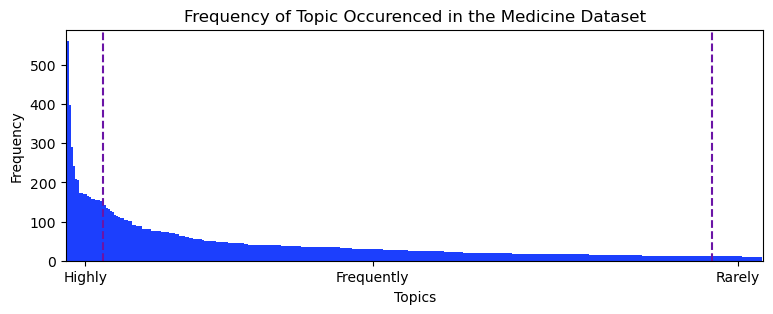

In [236]:
# Creating the graph
plt.figure(figsize=(9, 3))
plt.bar(range(len(medicine_topics_pruned)), medicine_topics_pruned, color='#1c3ffd', width=1)
plt.title('Frequency of Topic Occurenced in the Medicine Dataset')
plt.xlabel('Topics')
plt.ylabel('Frequency')
# Remove x-axis ticks and labels
plt.xticks(ticks=[])
# Adjust the x-axis limits to remove space
plt.xlim(-1, len(medicine_topics_pruned))

custom_ticks = [top_perc_tick, middle_perc_tick, bottom_perc_tick]  # Example positions
custom_labels = ['Highly', 'Frequently', 'Rarely']  # Example labels

plt.xticks(custom_ticks, custom_labels)

plt.axvline(x=top_pos_index, color='#6b14a6', linestyle='--')
plt.axvline(x=bottom_pos_index, color='#6b14a6', linestyle='--')

plt.show()

### Medicine Segmented Topic Graphs

In [238]:
medicine_topics_highly_pruned = medicine_topics_pruned[:int(top_pos_index)].copy()
medicine_topics_frequently_pruned = medicine_topics_pruned[int(top_pos_index):int(bottom_pos_index)].copy()
medicine_topics_rarely_pruned = medicine_topics_pruned[int(bottom_pos_index):].copy()

### Media Data

In [192]:
media_topics = media_data['topic_name'].value_counts()

In [193]:
media_topics_pruned = media_topics[1:].copy()

In [240]:
# Inter-Quartile Range
top_perc = np.percentile(media_topics_pruned, 95)
bottom_perc = np.percentile(media_topics_pruned, 5)
perc_range = top_perc - bottom_perc

# Find the indices of the closest values to the percentiles
top_index = (np.abs(media_topics_pruned - top_perc)).idxmin()
bottom_index = (np.abs(media_topics_pruned - bottom_perc)).idxmin()

top_pos_index = media_topics_pruned.index.get_loc(top_index)
bottom_pos_index = media_topics_pruned.index.get_loc(bottom_index)

top_perc_tick = top_pos_index/2
middle_perc_tick = (bottom_pos_index - top_pos_index)/2
bottom_perc_tick = (bottom_pos_index + len(media_topics_pruned))/2

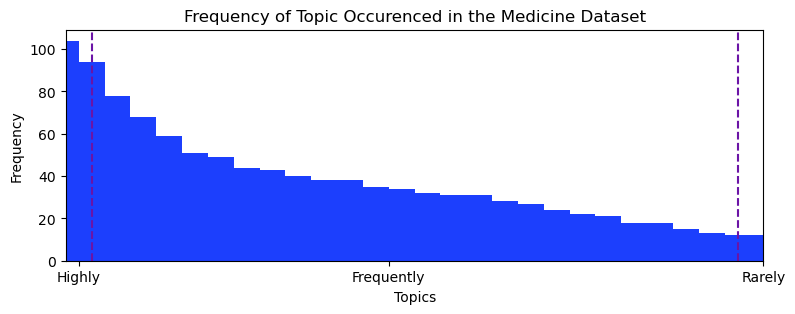

In [244]:
# Creating the graph
plt.figure(figsize=(9, 3))
plt.bar(range(len(media_topics_pruned)), media_topics_pruned, color='#1c3ffd', width=1)
plt.title('Frequency of Topic Occurenced in the Medicine Dataset')
plt.xlabel('Topics')
plt.ylabel('Frequency')
# Remove x-axis ticks and labels
plt.xticks(ticks=[])
# Adjust the x-axis limits to remove space
plt.xlim(0, len(media_topics_pruned)-1)

custom_ticks = [top_perc_tick, middle_perc_tick, bottom_perc_tick]  # Example positions
custom_labels = ['Highly', 'Frequently', 'Rarely']  # Example labels

plt.xticks(custom_ticks, custom_labels)

plt.axvline(x=top_pos_index, color='#6b14a6', linestyle='--')
plt.axvline(x=bottom_pos_index, color='#6b14a6', linestyle='--')

plt.show()